# Analyse des ventes de jeux vidéo

Le fichier `video_games_sales.csv` contient des informations sur les ventes de nombreux jeux vidéo. L'année de sortie, le genre, les notes et le nombre de ventes pour différents territoires sont présents dans ce fichier.

## Premiers pas avec l'ensemble de données

In [ ]:
# Utilisez la bibliothèque pandas pour lire le fichier `video_games_sales.csv`
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = "video_games_sales.csv"
data_video_games = pd.read_csv(filename)
data_video_games.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [ ]:
# Combien de colonnes contient-il ?
print("{} contains {} columns.".format(filename, data_video_games.columns.size))

video_games_sales.csv contains 16 columns.


In [ ]:
# Combien de jeux vidéo **uniques** sont signalés dans cet ensemble de données ?
n_unique_game = data_video_games.Name.unique().size
print("There are {} unique videos games in {}.".format(n_unique_game, filename))

There are 11563 unique videos games in video_games_sales.csv.


In [ ]:
# Quelle est l'année de sortie la plus ancienne ? La plus récente ?
oldest_year = data_video_games.Year_of_Release.min()
most_recent_year = data_video_games.Year_of_Release.max()
print("Oldest release year: {:.0f}".format(oldest_year))
print("Most recent release year: {:.0f}".format(most_recent_year))

Oldest release year: 1980
Most recent release year: 2020


In [ ]:
# Combien d'éditeurs différents sont présents ? Énumérez-les
unique_publishers = data_video_games.Publisher.unique()

# certains jeux ont NaN comme éditeur. Supprimez-le de la liste unique
unique_publishers = [x for x in unique_publishers if type(x) == str]

print("There are {} unique publishers:".format(len(unique_publishers)))
print(' / '.join(sorted(unique_publishers)))

There are 581 unique publishers:
10TACLE Studios / 1C Company / 20th Century Fox Video Games / 2D Boy / 3DO / 49Games / 505 Games / 5pb / 7G//AMES / 989 Sports / 989 Studios / AQ Interactive / ASC Games / ASCII Entertainment / ASCII Media Works / ASK / Abylight / Acclaim Entertainment / Accolade / Ackkstudios / Acquire / Activision / Activision Blizzard / Activision Value / Adeline Software / Aerosoft / Agatsuma Entertainment / Agetec / Aksys Games / Alawar Entertainment / Alchemist / Alternative Software / Altron / Alvion / American Softworks / Angel Studios / Answer Software / Aqua Plus / Aques / Arc System Works / Arena Entertainment / Aria / Arika / ArtDink / Aruze Corp / Ascaron Entertainment / Ascaron Entertainment GmbH / Asgard / Asmik Ace Entertainment / Asmik Corp / Aspyr / Astragon / Asylum Entertainment / Atari / Athena / Atlus / Avalon Interactive / Avanquest / Avanquest Software / Axela / BAM! Entertainment / BMG Interactive Entertainment / BPS / Banpresto / Benesse / Berk

<Axes: ylabel='Platform'>

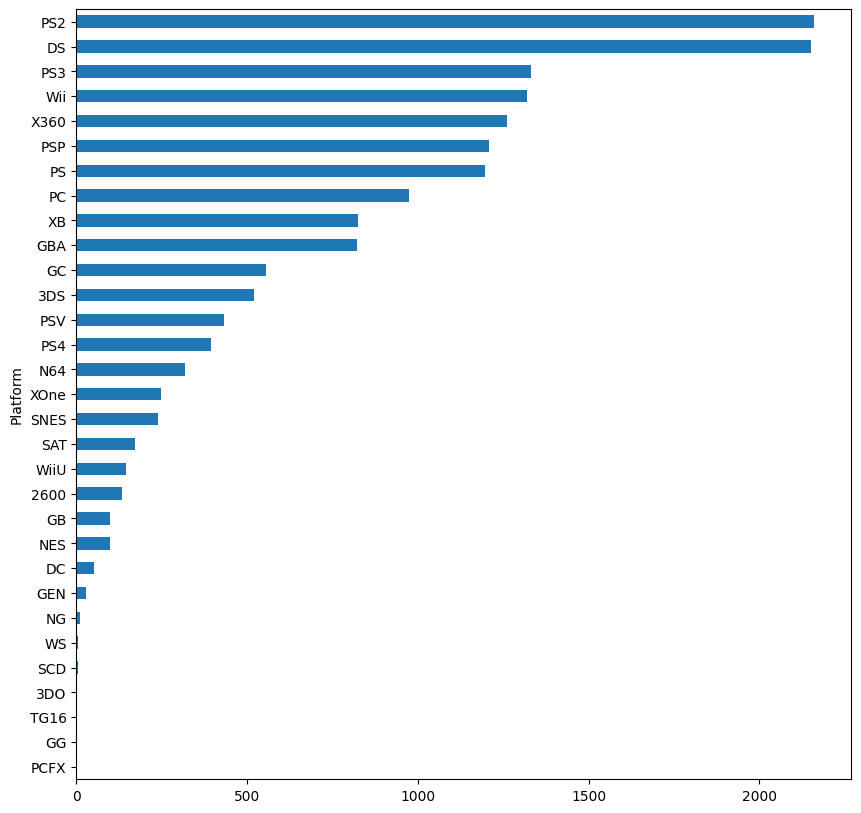

In [ ]:
# Comptez le nombre de jeux sortis pour chaque plateforme.
n_games_per_platform = data_video_games["Platform"].value_counts()

# Triez-les par ordre croissant et imprimez-les dans un
# graphique à barres horizontales.
n_games_per_platform_sorted = n_games_per_platform.sort_values()
n_games_per_platform_sorted.plot(kind="barh", figsize=(10, 10))

## Analyser les ventes

The most selling year was 2008.


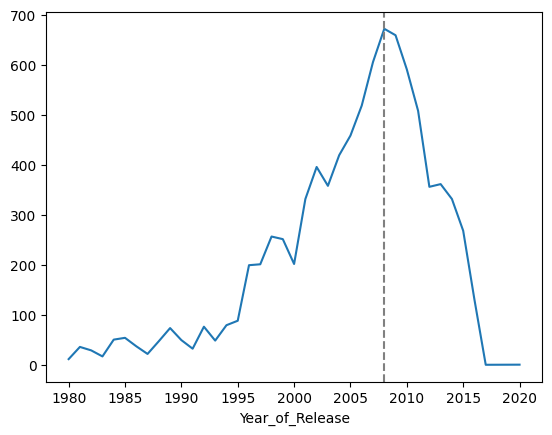

In [ ]:
# Imprimez avec une ligne de tracé les ventes mondiales pour chaque année.
# Quelle a été l'année la plus vendue ?
sales_per_year = data_video_games.groupby("Year_of_Release").sum().Global_Sales
sales_per_year.plot()
most_selling_year = sales_per_year.idxmax()
plt.axvline(most_selling_year, color="gray", linestyle="--")
print("The most selling year was {:.0f}.".format(most_selling_year))

In [ ]:
# Quels sont les 10 jeux les plus vendus ? (toutes plateformes confondues)
# combiné)

# Nous devons regrouper par noms, de sorte que, par exemple, les ventes
# de GTA V X360 et GTA V PS3 sont comptés ensemble (c'est-à-dire les plates-formes
# sont combinés)
sales_per_game = data_video_games.groupby("Name").sum().Global_Sales
most_selling_games = sales_per_game.sort_values(ascending=False)
most_selling_games.head(10) # Top 10

Name
Wii Sports                        82.53
Grand Theft Auto V                56.57
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Black Ops           30.82
Call of Duty: Modern Warfare 3    30.59
New Super Mario Bros.             29.80
Name: Global_Sales, dtype: float64

<Axes: xlabel='Name'>

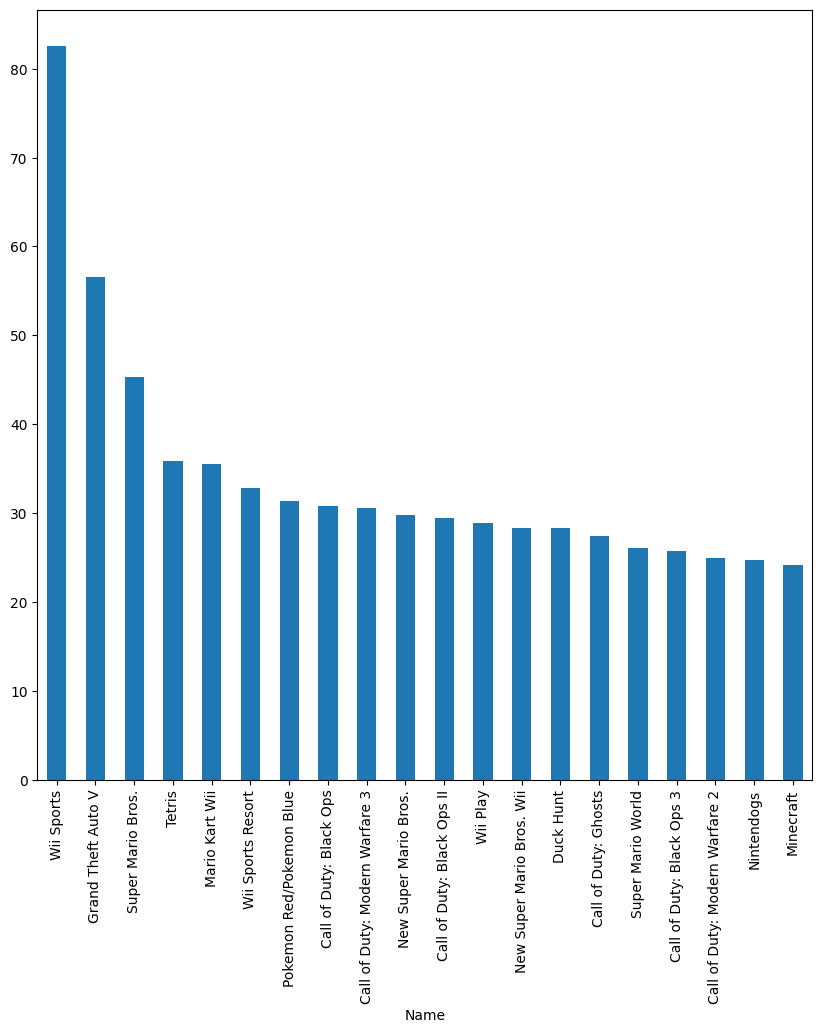

In [ ]:
# Utilisez un graphique à barres verticales pour visualiser les ventes de
# top 20 des jeux les plus vendus. Vous devrez peut-être faire tourner le
# étiquettes sur l'axe des x.
most_selling_games.head(20).plot(kind="bar", figsize=(10, 10))

<Axes: ylabel='Name'>

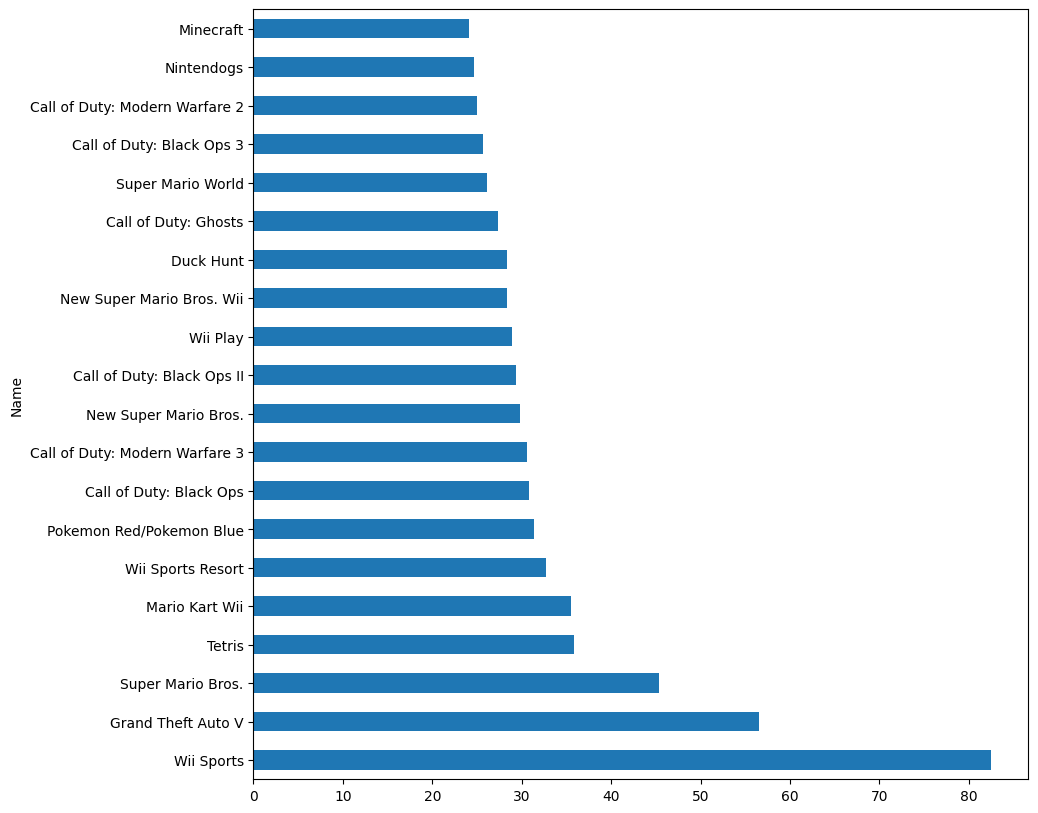

In [ ]:
# Je ne m'en suis pas rendu compte lors de la réalisation de la mission, mais un
# le graphique à barres horizontales est meilleur pour la visualisation
most_selling_games.head(20).plot(kind="barh", figsize=(10, 10))

<Axes: title={'center': 'PS3'}>

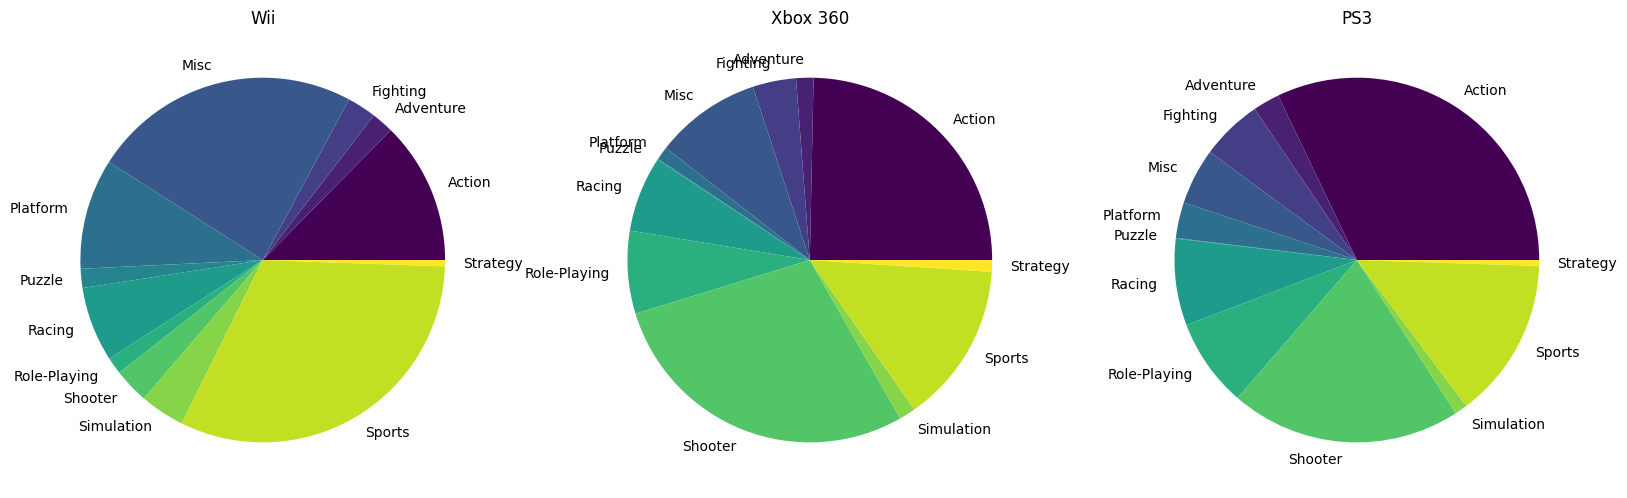

In [ ]:
# Utilisez un graphique à secteurs pour visualiser les ventes des différents
# genres sur la plate-forme Wii. Faites la même chose pour la X360
# et la PS3.
ratio_genre_platform = data_video_games.groupby(["Platform", "Genre"]).sum().Global_Sales
ratio_genre_wii  = ratio_genre_platform.loc["Wii"]
ratio_genre_x360 = ratio_genre_platform.loc["X360"]
ratio_genre_ps3  = ratio_genre_platform.loc["PS3"]

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ratio_genre_wii.plot(kind="pie", ax=ax[0], colormap="viridis", label="", title="Wii")
ratio_genre_x360.plot(kind="pie", ax=ax[1], colormap="viridis", label="", title="Xbox 360")
ratio_genre_ps3.plot(kind="pie", ax=ax[2], colormap="viridis", label="", title="PS3")

In [ ]:
# Quelles sont les 10 exclusivités Xbox les plus vendues ? Un jeu
# peut être considéré comme une exclusivité Xbox si l'« éditeur »
# est « Microsoft Game Studios ».
xbox_exclusives = data_video_games[data_video_games.Publisher == "Microsoft Game Studios"]
xbox_exclusives_sorted = xbox_exclusives.sort_values(by="Global_Sales", ascending=False)
xbox_exclusives_sorted.head(10)[["Name", "Global_Sales"]]

Name  Global_Sales
14     Kinect Adventures!         21.81
44                 Halo 3         12.12
64            Halo: Reach          9.86
66                 Halo 4          9.71
72              Minecraft          9.18
78                 Halo 2          8.49
117        Gears of War 2          6.75
129  Halo: Combat Evolved          6.43
134          Halo 3: ODST          6.34
140        Gears of War 3          6.21

In [ ]:
# Quelles sont les 10 exclusivités Sony les plus vendues ?
sony_exclusives = data_video_games[data_video_games.Publisher == "Sony Computer Entertainment"]
sony_exclusives_sorted = sony_exclusives.sort_values(by="Global_Sales", ascending=False)
sony_exclusives_sorted.head(10)[["Name", "Global_Sales"]]

Name  Global_Sales
28                   Gran Turismo 3: A-Spec         14.98
48                           Gran Turismo 4         11.66
52                             Gran Turismo         10.95
54                           Gran Turismo 5         10.70
65                        Final Fantasy VII          9.72
67                           Gran Turismo 2          9.49
84                          Final Fantasy X          8.05
95   Crash Bandicoot 2: Cortex Strikes Back          7.58
106                                Tekken 3          7.16
109               Crash Bandicoot 3: Warped          7.13

/tmp/ipython-input-562270472.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_video_games.Name.fillna("", inplace=True)


<Axes: ylabel='Name'>

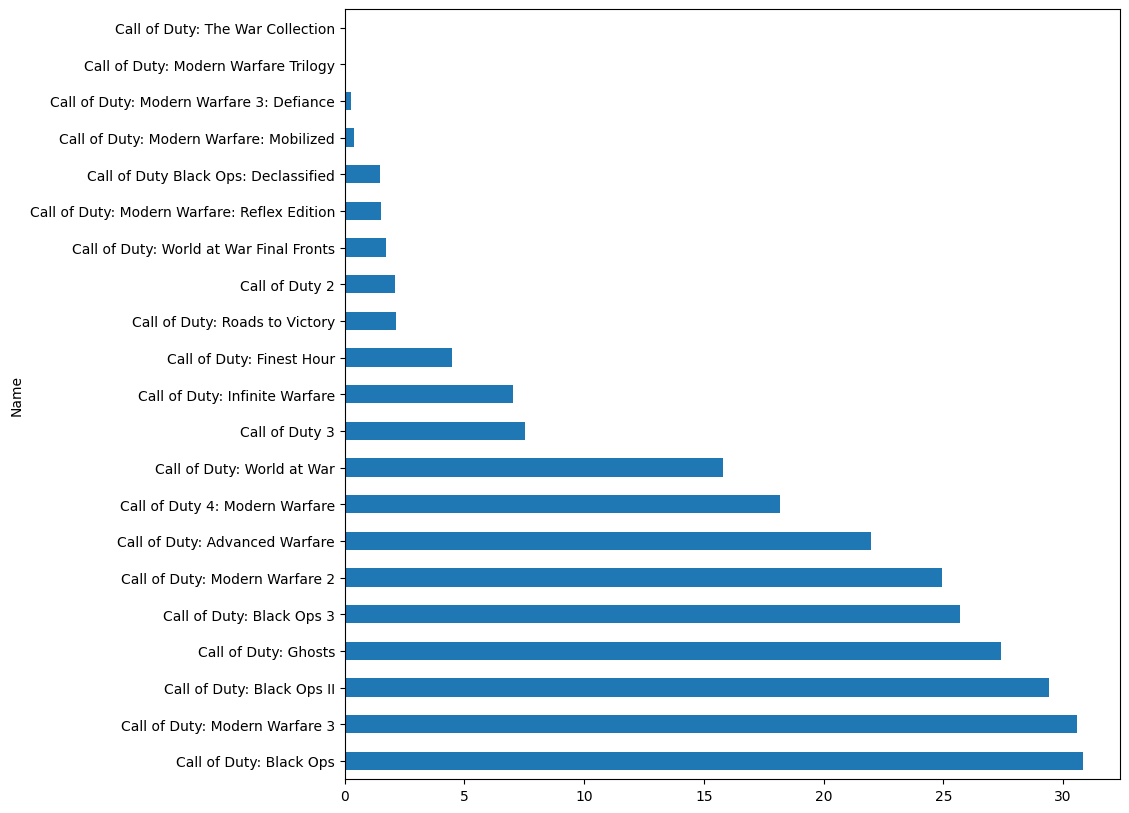

In [ ]:
# Le jeu vidéo Call of Duty compte de nombreux opus. Trouvez le numéro
# des ventes pour chaque opus, puis les trier par ordre décroissant
# et les imprimez avec un graphique à barres horizontales.
data_video_games.Name.fillna("", inplace=True)
call_of = data_video_games[data_video_games.Name.str.contains("Call of Duty")]
sales_per_call_of = call_of.groupby("Name").sum().Global_Sales
sales_per_call_of_sorted = sales_per_call_of.sort_values(ascending=False)
sales_per_call_of_sorted.plot(kind="barh", figsize=(10, 10))

## Surestimé, sous-estimé

Un jeu peut être considéré comme *surévalué* si le score des critiques est bien supérieur au score des utilisateurs. Un jeu peut être considéré comme *sous-estimé* si le score des critiques est bien inférieur au score des utilisateurs.

In [ ]:
# Ajoutez une nouvelle colonne qui calcule la différence entre
# le score critique et le score utilisateur.

# Commençons par examiner les valeurs des scores des critiques/utilisateurs.
print(data_video_games[["Critic_Score", "User_Score"]].head(10))

   Critic_Score User_Score
0          76.0          8
1           NaN        NaN
2          82.0        8.3
3          80.0          8
4           NaN        NaN
5           NaN        NaN
6          89.0        8.5
7          58.0        6.6
8          87.0        8.4
9           NaN        NaN


In [ ]:
# Il semble que Critic_Score soit BIEN plus grand que User_score.
# En effet, Critic_Score est compris entre 0 et 100 tandis que User_score est compris entre 0 et 10.
# De nombreuses lignes contiennent également NaN. Il ne sera pas possible de calculer un
# il n'y a pas de différence significative pour ces lignes, alors commencez par les supprimer.
video_games_with_ratings = data_video_games.dropna(subset=["Critic_Score", "User_Score"])

# Il existe également des jeux avec un User_Score défini sur « tbd ». Laissez tomber.
video_games_with_ratings = video_games_with_ratings[video_games_with_ratings.User_Score != "tbd"]

# Convertir en flottant car la valeur « tbd » a défini toutes les valeurs à
# considéré comme un « objet », et nous ne pouvons pas faire d'arithmétique avec « objet »
video_games_with_ratings.User_Score = video_games_with_ratings.User_Score.astype(float, copy=False)

# Ensuite, calculez la différence
video_games_with_ratings["Scores_Difference"] = video_games_with_ratings["Critic_Score"] \
                                              - 10*video_games_with_ratings["User_Score"]
print("The first values for the new \"Scores_Difference\" column:")
print(video_games_with_ratings.Scores_Difference.head())

The first values for the new "Scores_Difference" column:
0   -4.0
2   -1.0
3    0.0
6    4.0
7   -8.0
Name: Scores_Difference, dtype: float64


In [ ]:
# Quels sont les 10 jeux les plus surfaits ?

# Dans mon cas, la différence est Critic_Score - User_Score,
# donc les jeux surfaits sont ceux avec le plus grand (positif)
# différences.
scores_differences_sorted = video_games_with_ratings.sort_values(by="Scores_Difference", ascending=False)
top_10_overrated = scores_differences_sorted.head(10)
top_10_overrated[["Name", "Platform", "Critic_Score", "User_Score"]]

Name Platform  Critic_Score  User_Score
10483      Thrillville: Off the Rails      PSP          72.0         0.6
5379              Company of Heroes 2       PC          80.0         2.1
37     Call of Duty: Modern Warfare 3      PS3          88.0         3.2
29     Call of Duty: Modern Warfare 3     X360          88.0         3.4
4621       Thrillville: Off the Rails      PS2          70.0         1.7
1040   Call of Duty: Modern Warfare 3       PC          78.0         2.5
2500   Call of Duty: Modern Warfare 3      Wii          70.0         1.8
16204           Football Manager Live       PC          82.0         3.1
192                        Diablo III       PC          88.0         4.0
5753        Skylanders: SuperChargers      PS4          81.0         3.3

In [ ]:
# Quels sont les 10 jeux les plus sous-estimés ?

# Dans mon cas, la différence est Critic_Score - User_Score,
# donc les jeux sous-estimés sont ceux qui ont le plus grand (négatif)
# différences, c'est-à-dire la plus petite différence. Les jeux sont déjà
# triés par cette différence dans l'ordre décroissant, alors prenez le
# derniers éléments pour obtenir ceux avec la plus petite différence. Mais inversez
# car sinon le dernier élément (c'est-à-dire le plus sous-estimé) serait
# être en bas du tableau.
top_10_underrated = scores_differences_sorted.tail(10)
top_10_underrated[["Name", "Platform", "Critic_Score", "User_Score"]][::-1]

Name Platform  \
5825                           Shrek Swamp Kart Speedway      GBA   
15991                                Antz Extreme Racing       XB   
9480                                   Shrek Super Party       XB   
14615                              Street Jam Basketball      GBA   
9892                 Airborne Troops: Countdown to D-Day      PS2   
7486            BeyBlade VForce: Super Tournament Battle       GC   
14692  Buffy the Vampire Slayer: Wrath of the Darkhul...      GBA   
7699                           Predator: Concrete Jungle      PS2   
8110                                         Pure Futbol     X360   
13576                              Backyard Baseball '09      Wii   

       Critic_Score  User_Score  
5825           27.0         8.9  
15991          35.0         8.7  
9480           33.0         8.0  
14615          35.0         8.0  
9892           39.0         8.1  
7486           33.0         7.5  
14692          44.0         8.6  
7699           47.0         8.8  
8110           38.0         7.9  
13576          37.0         7.8